# Problem: Maintenance Cost Reduction Through Predictive Techniques

**BACKGROUND**
A company has a fleet of devices transmitting daily telemetry readings. They would like to create a predictive
maintenance solution to proactively identify when maintenance should be performed. This approach promises cost
savings over routine or time-based preventive maintenance, because tasks are performed only when warranted.

**GOAL**
You are tasked with building a predictive model using machine learning to predict the probability of a device failure.
When building this model, be sure to minimize false positives and false negatives. The column you are trying to predict is called failure with binary value 0 for non-failure and 1 for failure.

## Information about the dataset

|Field | Description |
| --- | --- |
|Date | Timestamp of a device transmitting daily telemetry readings. |
|Device | Name of the device. |
|Failure | Column to predict using ML models. |
|Metric 1 | Metric one, transmitted by the device. |
|Metric 2 | Metric two, transmitted by the device. |
|Metric 3 | Metric three, transmitted by the device. |
|Metric 4 | Metric four, transmitted by the device. | 
|Metric 5| Metric five, transmitted by the device. |
|Metric 6| Metric six, transmitted by the device. |
|Metric 7| Metric seven, transmitted by the device. |
|Metric 8| Metric eight, transmitted by the device. |
|Metric 9| Metric nine, transmitted by the device. |

# Basic Imports

In [1]:
# Pandas and numpy for data manipulation
import pandas as pd
import numpy as np
from numpy import arange

# Silent warnings
import warnings
warnings.filterwarnings('ignore')

# Libraries for visualization 
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.dates import DayLocator, HourLocator, DateFormatter, date2num
%matplotlib inline
import seaborn as sns

# Libraries used for one hot encoding
from numpy import array, argmax
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Train_test_split function from sklearn to split the dataset
from sklearn.model_selection import train_test_split

# Machine learning models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Performing grid search
from sklearn.model_selection import GridSearchCV 

# Confusion matrix
from sklearn.metrics import confusion_matrix
# Average precision score
from sklearn.metrics import average_precision_score
# Precision-Recall, AOC Curve
from inspect import signature
from sklearn.metrics import (confusion_matrix, precision_recall_curve, auc,
                             roc_curve, recall_score, classification_report, f1_score,
                             precision_recall_fscore_support)
#Latex
from IPython.display import display, Math, Latex

# Feature Importance from XGBoost
from xgboost import plot_importance
from matplotlib import pyplot

# Data loading, cleaning and formatting


**Load in the Data and Examine**

First and foremost step in any data analysis should be to get a basic understanding of data using Exploratory Data Analysis (EDA), followed by cleaning, if necessary. A cleaned data set prevents "garbage-in equals garbage-out type situation". For this demonstration I will be using pandas dataframe to analyze the dataset. However, there are other dataframes available like Spark and it is my personal choice to use pandas dataframe here. Spark is preferably used for bigger datasets. 

In [2]:
# Read in data into a dataframe
filename = "predictive_maintenance.csv"
device_telemetry_readings = pd.read_csv(filename)

# Display top of dataframe
device_telemetry_readings.head()

,date,device,failure,metric1,metric2,metric3,metric4,metric5,metric6,metric7,metric8,metric9
0,1/1/15,S1F01085,0,215630672,56,0,52,6,407438,0,0,7
1,1/1/15,S1F0166B,0,61370680,0,3,0,6,403174,0,0,0
2,1/1/15,S1F01E6Y,0,173295968,0,0,0,12,237394,0,0,0
3,1/1/15,S1F01JE0,0,79694024,0,0,0,6,410186,0,0,0
4,1/1/15,S1F01R2B,0,135970480,0,0,0,15,313173,0,0,3


## Datatypes and missing values 

The dataframe.info() method is a quick way to assess the data by displaying the data types of each column and the number of non-missing values. Looking at the output below, it is comforting to find that none of the columns contain no missing values out of 124494 total number of records. Since there are no data quality issues here, we'll dive straight into EDA. 

In [3]:
# See the column data types and non-missing values
device_telemetry_readings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124494 entries, 0 to 124493
Data columns (total 12 columns):
date       124494 non-null object
device     124494 non-null object
failure    124494 non-null int64
metric1    124494 non-null int64
metric2    124494 non-null int64
metric3    124494 non-null int64
metric4    124494 non-null int64
metric5    124494 non-null int64
metric6    124494 non-null int64
metric7    124494 non-null int64
metric8    124494 non-null int64
metric9    124494 non-null int64
dtypes: int64(10), object(2)
memory usage: 11.4+ MB


## Exploratory Data Analysis (EDA)

EDA is the first and fore-most step required to explore and understand our data. The purpose is to uncover anomalies, patterns, trends or relationships. These may be interesting by themselves (for example finding a correlation between two variables) or they can be used to inform modeling decisions such as which features to use. In short, the goal of EDA is to determine what our data can tell us. EDA generally starts out with a high-level overview, and then narrows in to specific parts of the dataset once as find interesting areas to examine.

**To begin the EDA, we will focus on univariate analysis (single variables) first.**

In [7]:
# Find unique device in our dataset
device_telemetry_readings.device.nunique()

1169

There are 1169 unique devices transmitting daily telemetry readings in the given dataset. 

### Uni-variate Analysis

#### Frequency distribution

Text(0.5, 1.0, 'Frequency Distribution of telemetry readings by device')

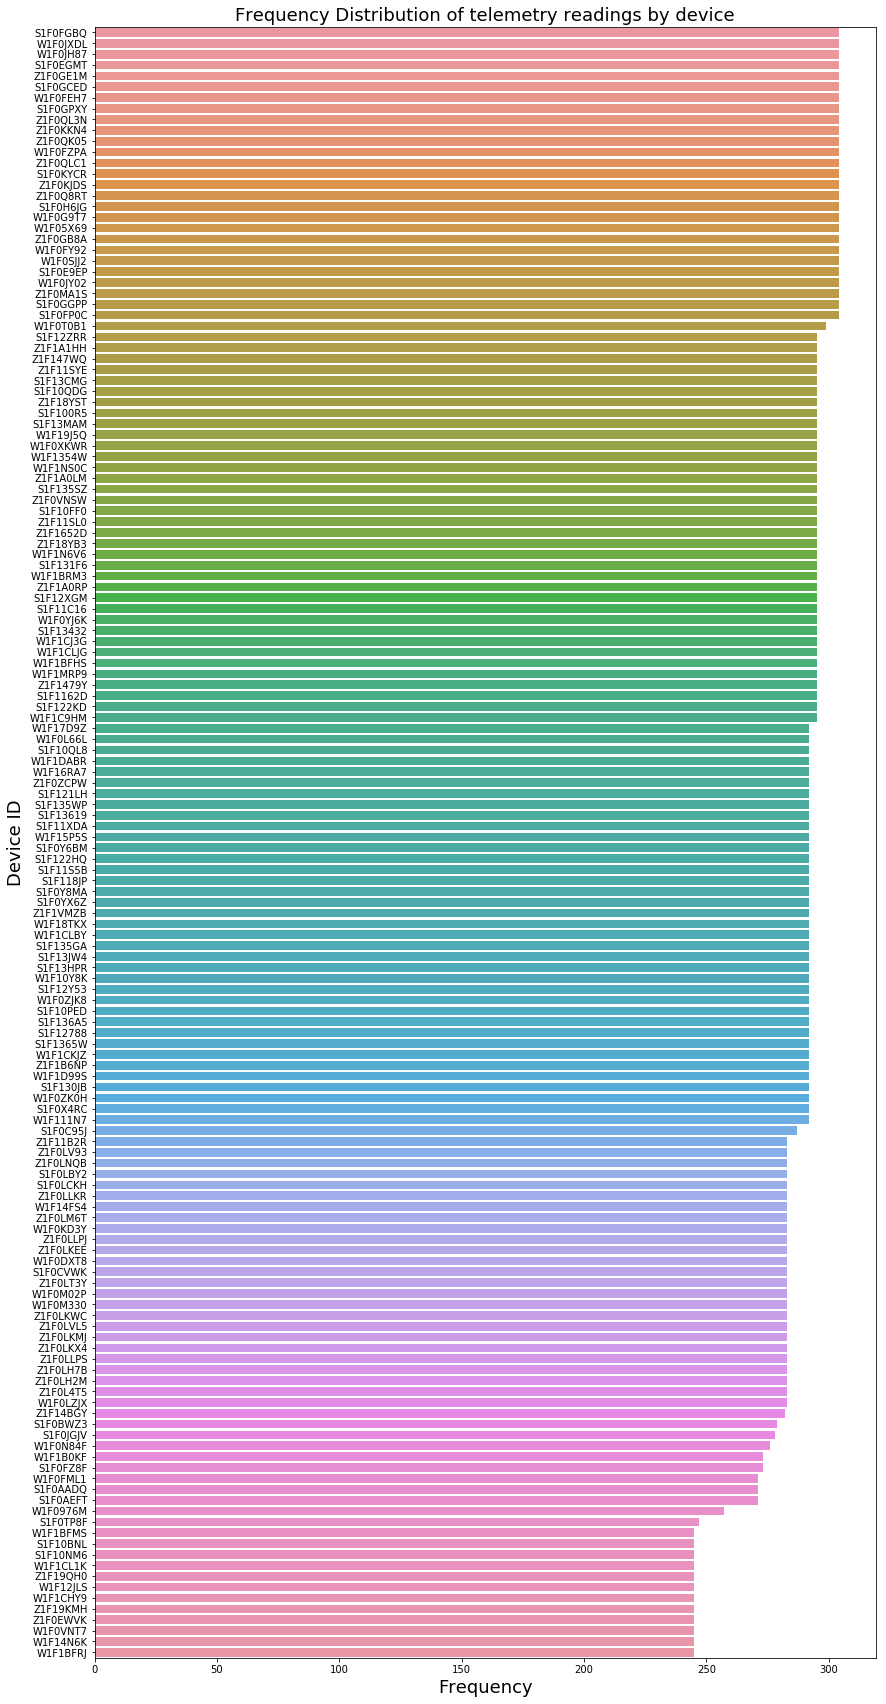

In [43]:
# Frequency of each device sending telemetry readings

plt.figure(figsize = (14,30))
sns.countplot(y = 'device', data = 
              device_telemetry_readings[device_telemetry_readings['device'].\
                                        isin(device_telemetry_readings['device'].value_counts()[:150].index)], 
             order = device_telemetry_readings['device'].value_counts().iloc[:150].index)
plt.ylabel('Device ID', fontsize = 18)
plt.xlabel('Frequency', fontsize = 18)
plt.title('Frequency Distribution of telemetry readings by device', fontsize = 18)

**Take-away message**: Frequency distribution displays grouping of various devices, which perhaps can be interpretted as similar types of devices transmitting telemetry readings on any given day. 

#### Time-series Display

In [80]:
# Selecting devices that have had failures in the past
device_failure = device_telemetry_readings[device_telemetry_readings['failure'] == 1]

In [81]:
device_failure.head()

,date,device,failure,metric1,metric2,metric3,metric4,metric5,metric6,metric7,metric8,metric9
4885,1/5/15,S1F0RRB1,1,48467332,64776,0,841,8,39267,56,56,1
6879,1/7/15,S1F0CTDN,1,184069720,528,0,4,9,387871,32,32,3
8823,1/9/15,W1F0PNA5,1,136429411,64784,0,406,30,224801,8,8,0
11957,1/13/15,W1F13SRV,1,188251248,2040,0,0,6,39345,32,32,1
12668,1/14/15,W1F1230J,1,220461296,0,0,0,14,325125,0,0,0


In [69]:
# Selecting one device to explore different metrics 
S1F0RRB1 = device_telemetry_readings[device_telemetry_readings['device'] == 'S1F0RRB1'].head()

In [126]:
# 
def plotDeviceMetric(x,y,metric,deviceID,z):
    '''Description: Python method to display time-series distribution of various metrics for devices.
       Input: x and y variables to plot, name of the metric and device ID, number for x-tick display.
       Output: Matplotlib figure. 
    '''
    
    plt.style.use('Solarize_Light2')
    
    fig, ax = plt.subplots(figsize=(15,5))
    ax.plot(x,y)
    
    # Formatting date column
    ax.fmt_xdata = DateFormatter('%Y-%m-%d')
    fig.autofmt_xdate()
    
    # Below code is used for displaying x-ticks as desired by the user
    every_nth = z
    for n, label in enumerate(ax.xaxis.get_ticklabels()):
        if n % every_nth != 0:
            label.set_visible(False)
    
    # Setting x,y labels and title
    plt.xlabel('Date', fontsize=17)
    plt.ylabel(metric, fontsize=17)
    plt.title('Distribution of metric for device ID = ' + deviceID)
    
    plt.show()

#### Failure [Failed device ID=S1F0RRB1] 

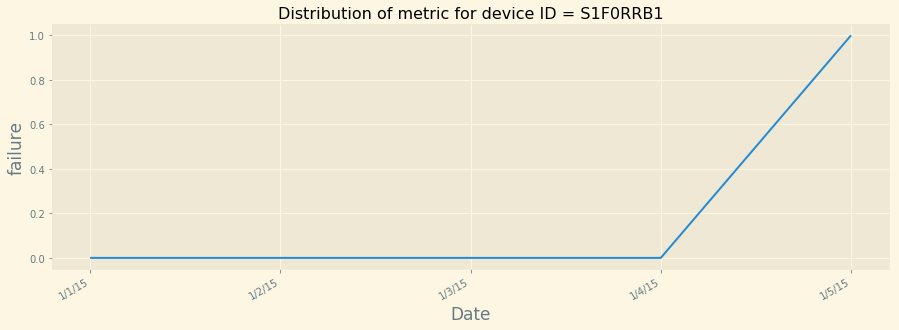

In [125]:
plotDeviceMetric(S1F0RRB1['date'],S1F0RRB1['failure'],'failure','S1F0RRB1',1)

####  Metric1 [Failed device ID=S1F0RRB1] 

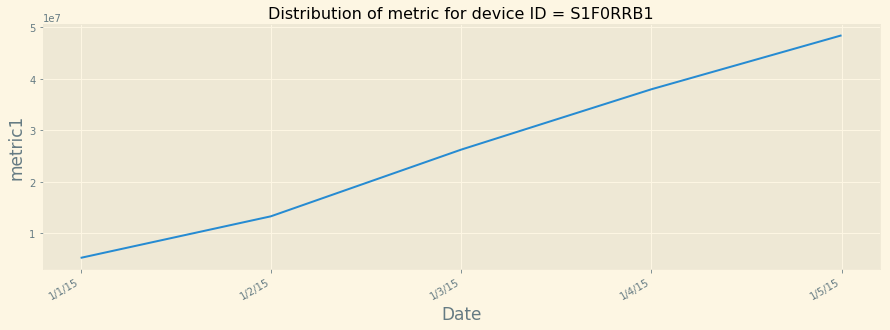

In [98]:
plotDeviceMetric(S1F0RRB1['date'], S1F0RRB1['metric1'],'metric1','S1F0RRB1',1)

#### Metric 2 [Failed device ID=S1F0RRB1] 

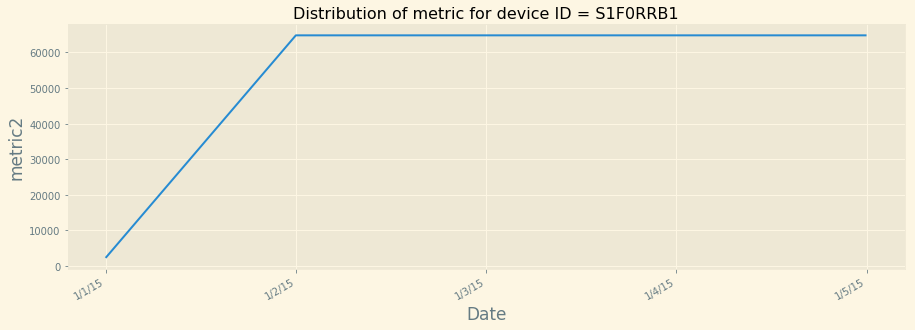

In [99]:
plotDeviceMetric(S1F0RRB1['date'], S1F0RRB1['metric2'],'metric2','S1F0RRB1',1)

#### Metric 3 [Failed device ID=S1F0RRB1] 

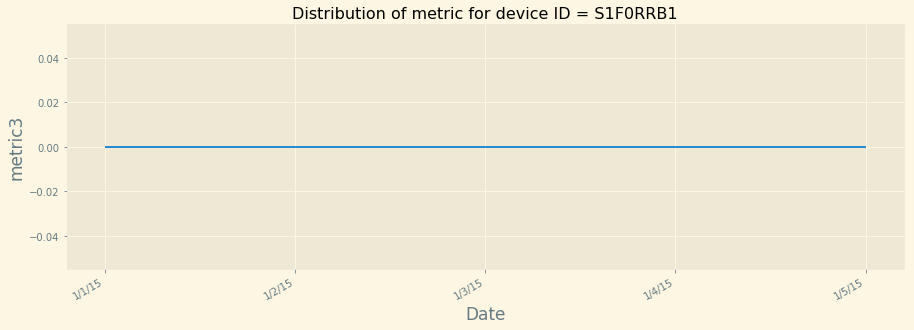

In [100]:
plotDeviceMetric(S1F0RRB1['date'], S1F0RRB1['metric3'],'metric3','S1F0RRB1',1)

#### Metric 4 [Failed device ID=S1F0RRB1] 

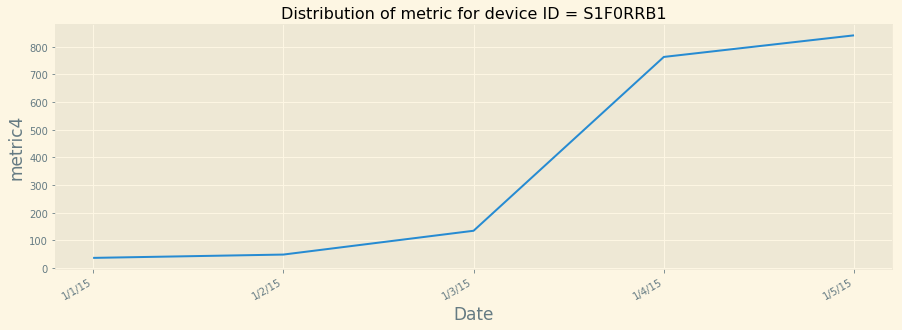

In [101]:
plotDeviceMetric(S1F0RRB1['date'], S1F0RRB1['metric4'],'metric4','S1F0RRB1',1)

#### Metric 5 [Failed device ID=S1F0RRB1] 

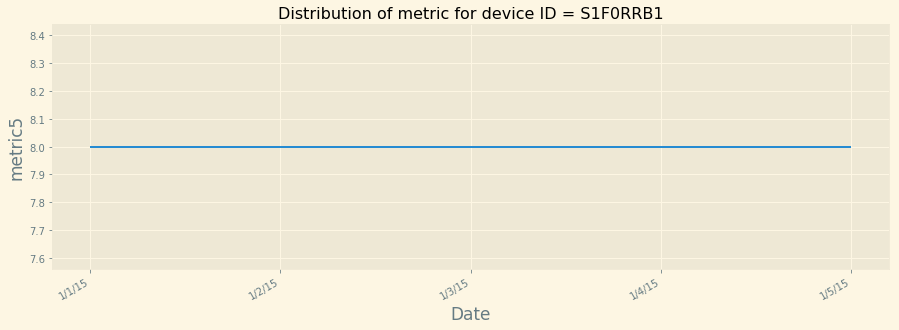

In [103]:
plotDeviceMetric(S1F0RRB1['date'], S1F0RRB1['metric5'],'metric5','S1F0RRB1',1)

#### Metric 6 [Failed device ID=S1F0RRB1] 

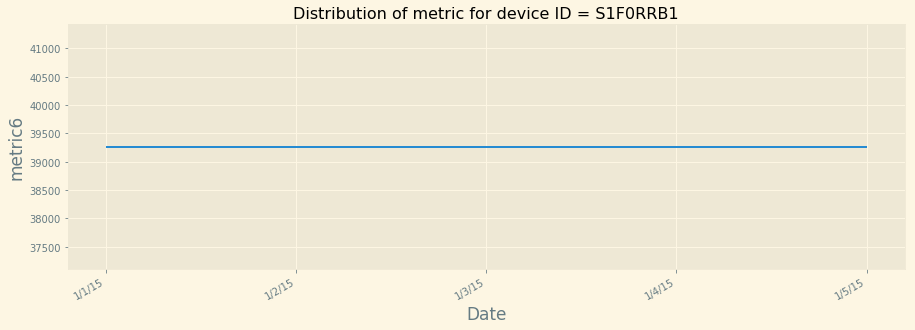

In [104]:
plotDeviceMetric(S1F0RRB1['date'], S1F0RRB1['metric6'],'metric6','S1F0RRB1',1)

#### Metric 7 [Failed device ID=S1F0RRB1] 

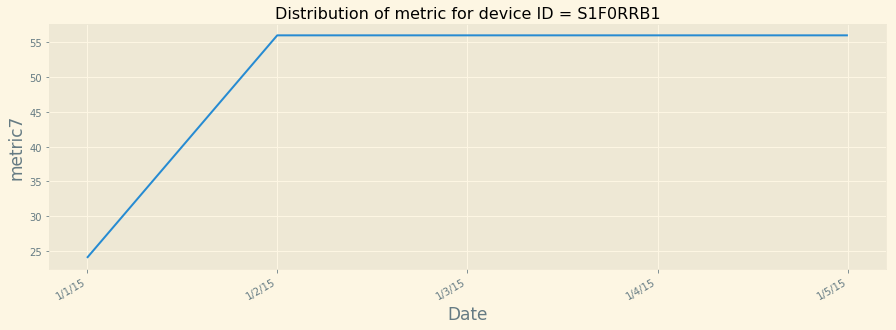

In [105]:
plotDeviceMetric(S1F0RRB1['date'], S1F0RRB1['metric7'],'metric7','S1F0RRB1',1)

#### Metric 8 [Failed device ID=S1F0RRB1] 

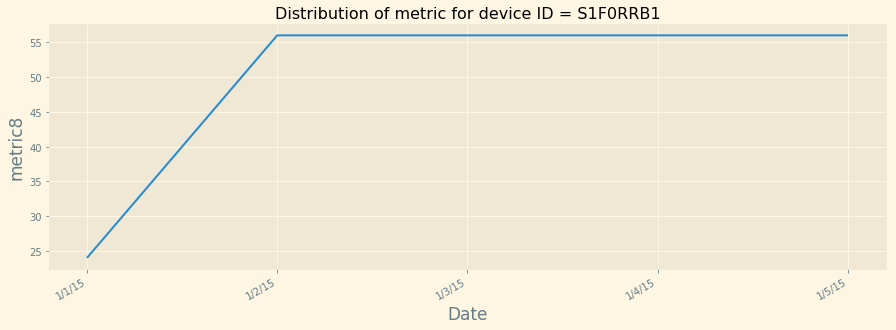

In [106]:
plotDeviceMetric(S1F0RRB1['date'], S1F0RRB1['metric8'],'metric8','S1F0RRB1',1)

#### Metric 9 [Failed device ID=S1F0RRB1] 

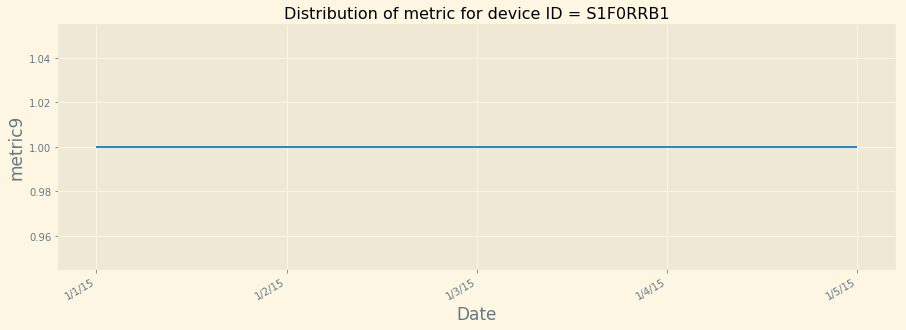

In [107]:
plotDeviceMetric(S1F0RRB1['date'], S1F0RRB1['metric9'],'metric9','S1F0RRB1',1)

**Take-away message 1:** I have selected one device ID (S1F0RRB1) that has had a failure in the past. The aim is to compare it's metric against a device ID that has never had a failure. 

**Take-away message 2:** It is interesting to observe that the dataset has redundant columns. It appears that metric 7 & 8 are exactly the same. 

In [87]:
# Selecting devices that have never failed in the past
device_notFailed = device_telemetry_readings[device_telemetry_readings['failure'] == 0]

In [88]:
device_notFailed.head()

,date,device,failure,metric1,metric2,metric3,metric4,metric5,metric6,metric7,metric8,metric9
0,1/1/15,S1F01085,0,215630672,56,0,52,6,407438,0,0,7
1,1/1/15,S1F0166B,0,61370680,0,3,0,6,403174,0,0,0
2,1/1/15,S1F01E6Y,0,173295968,0,0,0,12,237394,0,0,0
3,1/1/15,S1F01JE0,0,79694024,0,0,0,6,410186,0,0,0
4,1/1/15,S1F01R2B,0,135970480,0,0,0,15,313173,0,0,3


In [109]:
# Selecting one device without any failures to explore and compare different metrics 
S1F01085 = device_telemetry_readings[device_telemetry_readings['device'] == 'S1F01085'].head()

#### Failure [non-Failed device ID=S1F01085] 

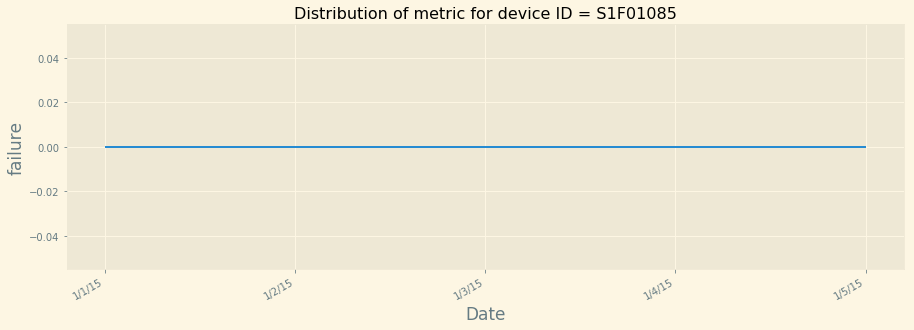

In [111]:
plotDeviceMetric(S1F01085['date'], S1F01085['failure'],'failure','S1F01085',1)

#### Metric 1 [non-Failed device ID=S1F01085] 

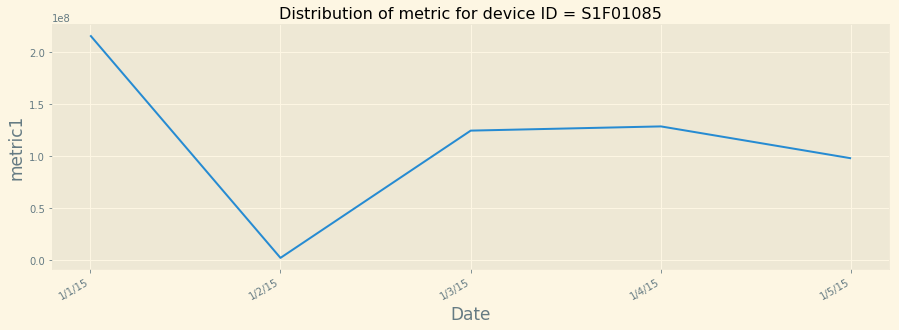

In [112]:
plotDeviceMetric(S1F01085['date'], S1F01085['metric1'],'metric1','S1F01085',1)

#### Metric 2 [non-Failed device ID=S1F01085] 

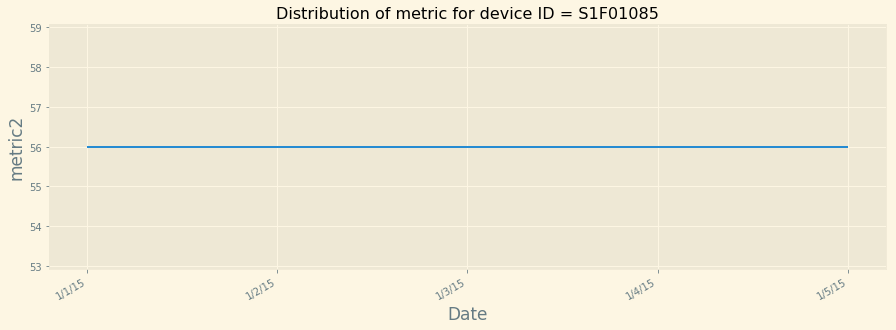

In [114]:
plotDeviceMetric(S1F01085['date'], S1F01085['metric2'],'metric2','S1F01085',1)

#### Metric 3 [non-Failed device ID=S1F01085] 

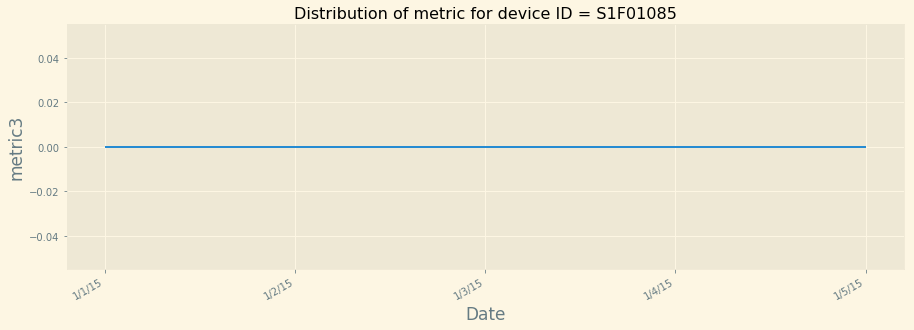

In [115]:
plotDeviceMetric(S1F01085['date'], S1F01085['metric3'],'metric3','S1F01085',1)

#### Metric 4 [non-Failed device ID=S1F01085] 

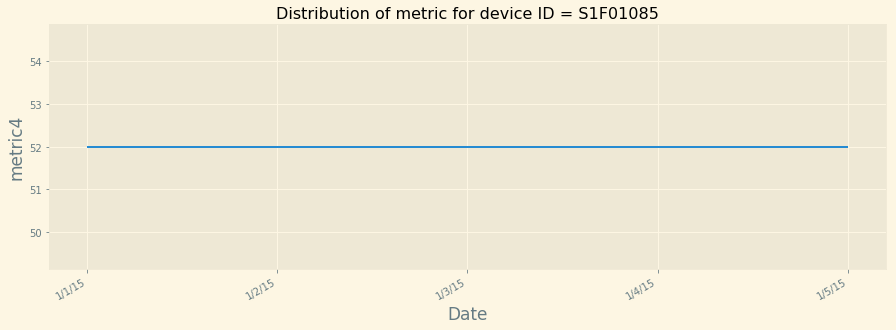

In [116]:
plotDeviceMetric(S1F01085['date'], S1F01085['metric4'],'metric4','S1F01085',1)

#### Metric 5 [non-Failed device ID=S1F01085] 

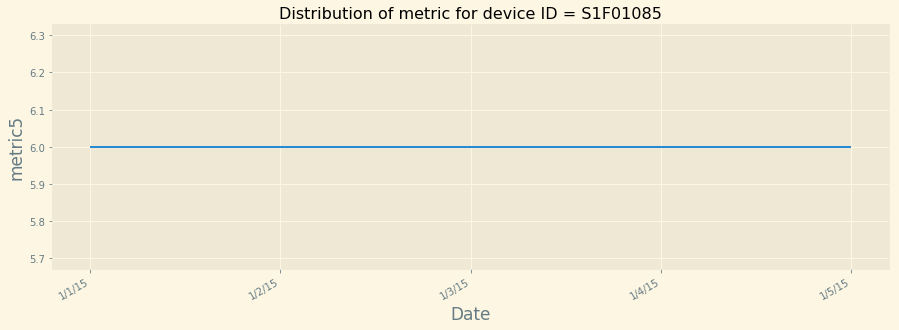

In [117]:
plotDeviceMetric(S1F01085['date'], S1F01085['metric5'],'metric5','S1F01085',1)

#### Metric 6 [non-Failed device ID=S1F01085] 

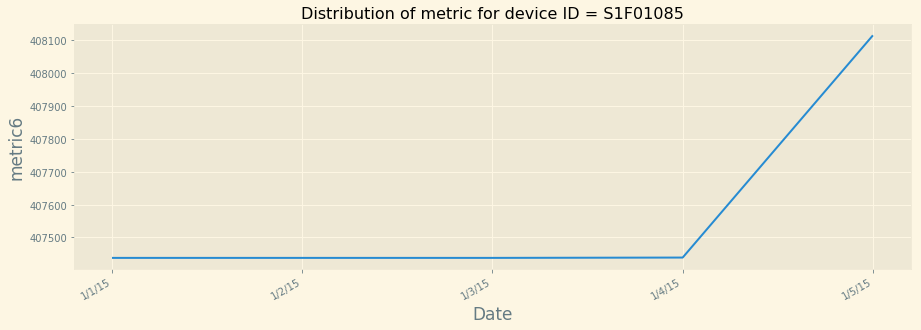

In [118]:
plotDeviceMetric(S1F01085['date'], S1F01085['metric6'],'metric6','S1F01085',1)

#### Metric 7 [non-Failed device ID=S1F01085] 

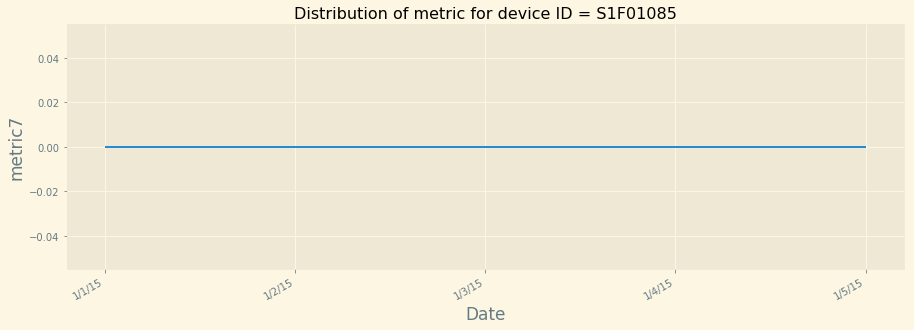

In [120]:
plotDeviceMetric(S1F01085['date'], S1F01085['metric7'],'metric7','S1F01085',1)

#### Metric 8 [non-Failed device ID=S1F01085] 

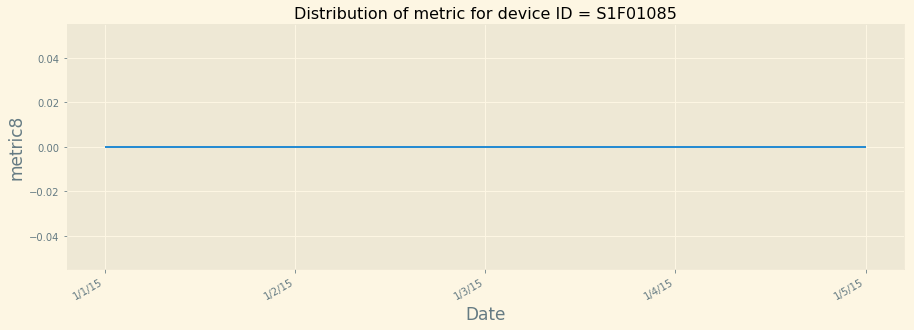

In [121]:
plotDeviceMetric(S1F01085['date'], S1F01085['metric8'],'metric8','S1F01085',1)

#### Metric 9 [non-Failed device ID=S1F01085] 

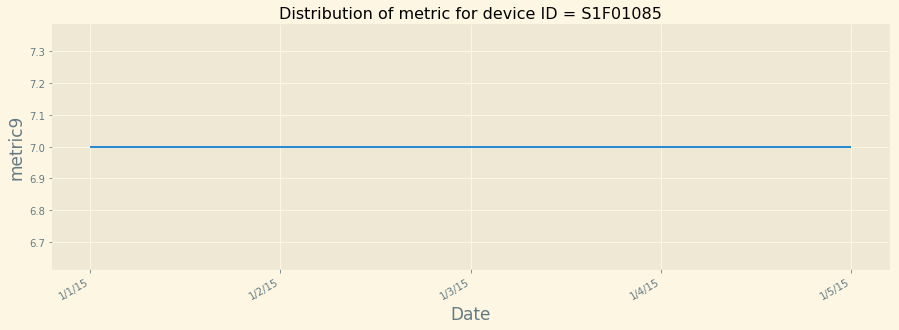

In [122]:
plotDeviceMetric(S1F01085['date'], S1F01085['metric9'],'metric9','S1F01085',1)

**Take-away message:** It is hard to differentiate between single variable plots for device that has failed versus a device that has not had a failure. So the next step is to jump into bi-variate analysis. 

### Bi-variate Analysis

#### Correlations between feature and target

Pearson correlation coefficient is commonly used to quantify correlations (linear or non-linear) between features (various variables in the dataset) and target (failure in our dataset). Coefficient strength of 1 represents very strong linear correlation between a given feature and target, while -1 displays anti-correlation between the two. Correlation strength of 0 may represent flat (no relation) between feature and target or may represent non-linear relationship also.

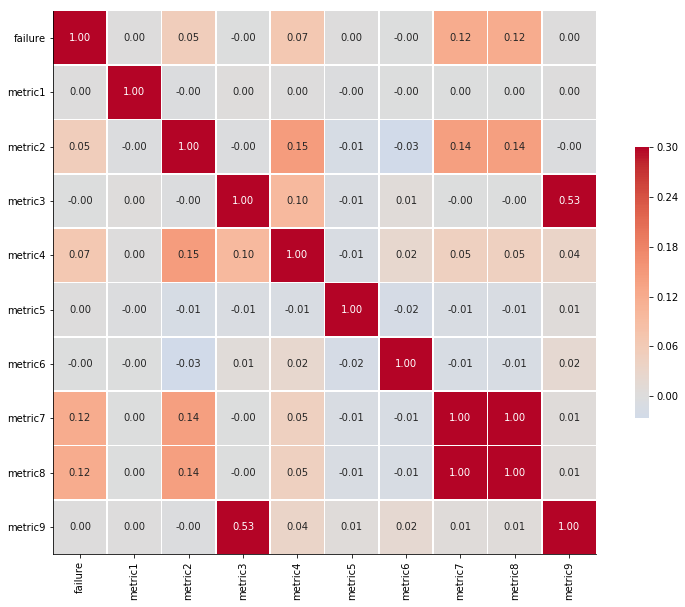

In [4]:
# Using seaborn and matplotlib to visualize correlations
corr = device_telemetry_readings.corr()
g = sns.heatmap(corr,  vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True, fmt='.2f', cmap='coolwarm')
sns.despine()
g.figure.set_size_inches(14,10)
    
plt.show()

In [128]:
device_telemetry_readings.columns

Index(['date', 'device', 'failure', 'metric1', 'metric2', 'metric3', 'metric4',
       'metric5', 'metric6', 'metric7', 'metric8', 'metric9'],
      dtype='object')

**Take-away message:** 
1. Metrics 7 & 8 are redundant features. Only one of the two are required, as they appear to be duplicates. 
2. Metrics 3 & 9 appear to be collinear. Additional pair plots will shed some more light on their collinearity. 

#### Pair plots

We will utilize pair plots as the last step in the EDA process to further explore relationships between the features in the given dataset. These plots will help us visualize collinearity exhibited in the Pearson correlation plot above in Section 3.2.2 between metrics 3 & 9. 

Using the seaborn PairGrid function, we can map different plots on to the three aspects of the grid. The upper triangle will have scatterplots, the diagonal will show histograms, and the lower triangle will show both the correlation coefficient between two variables and a 2-D kernel density estimate of the two variables.

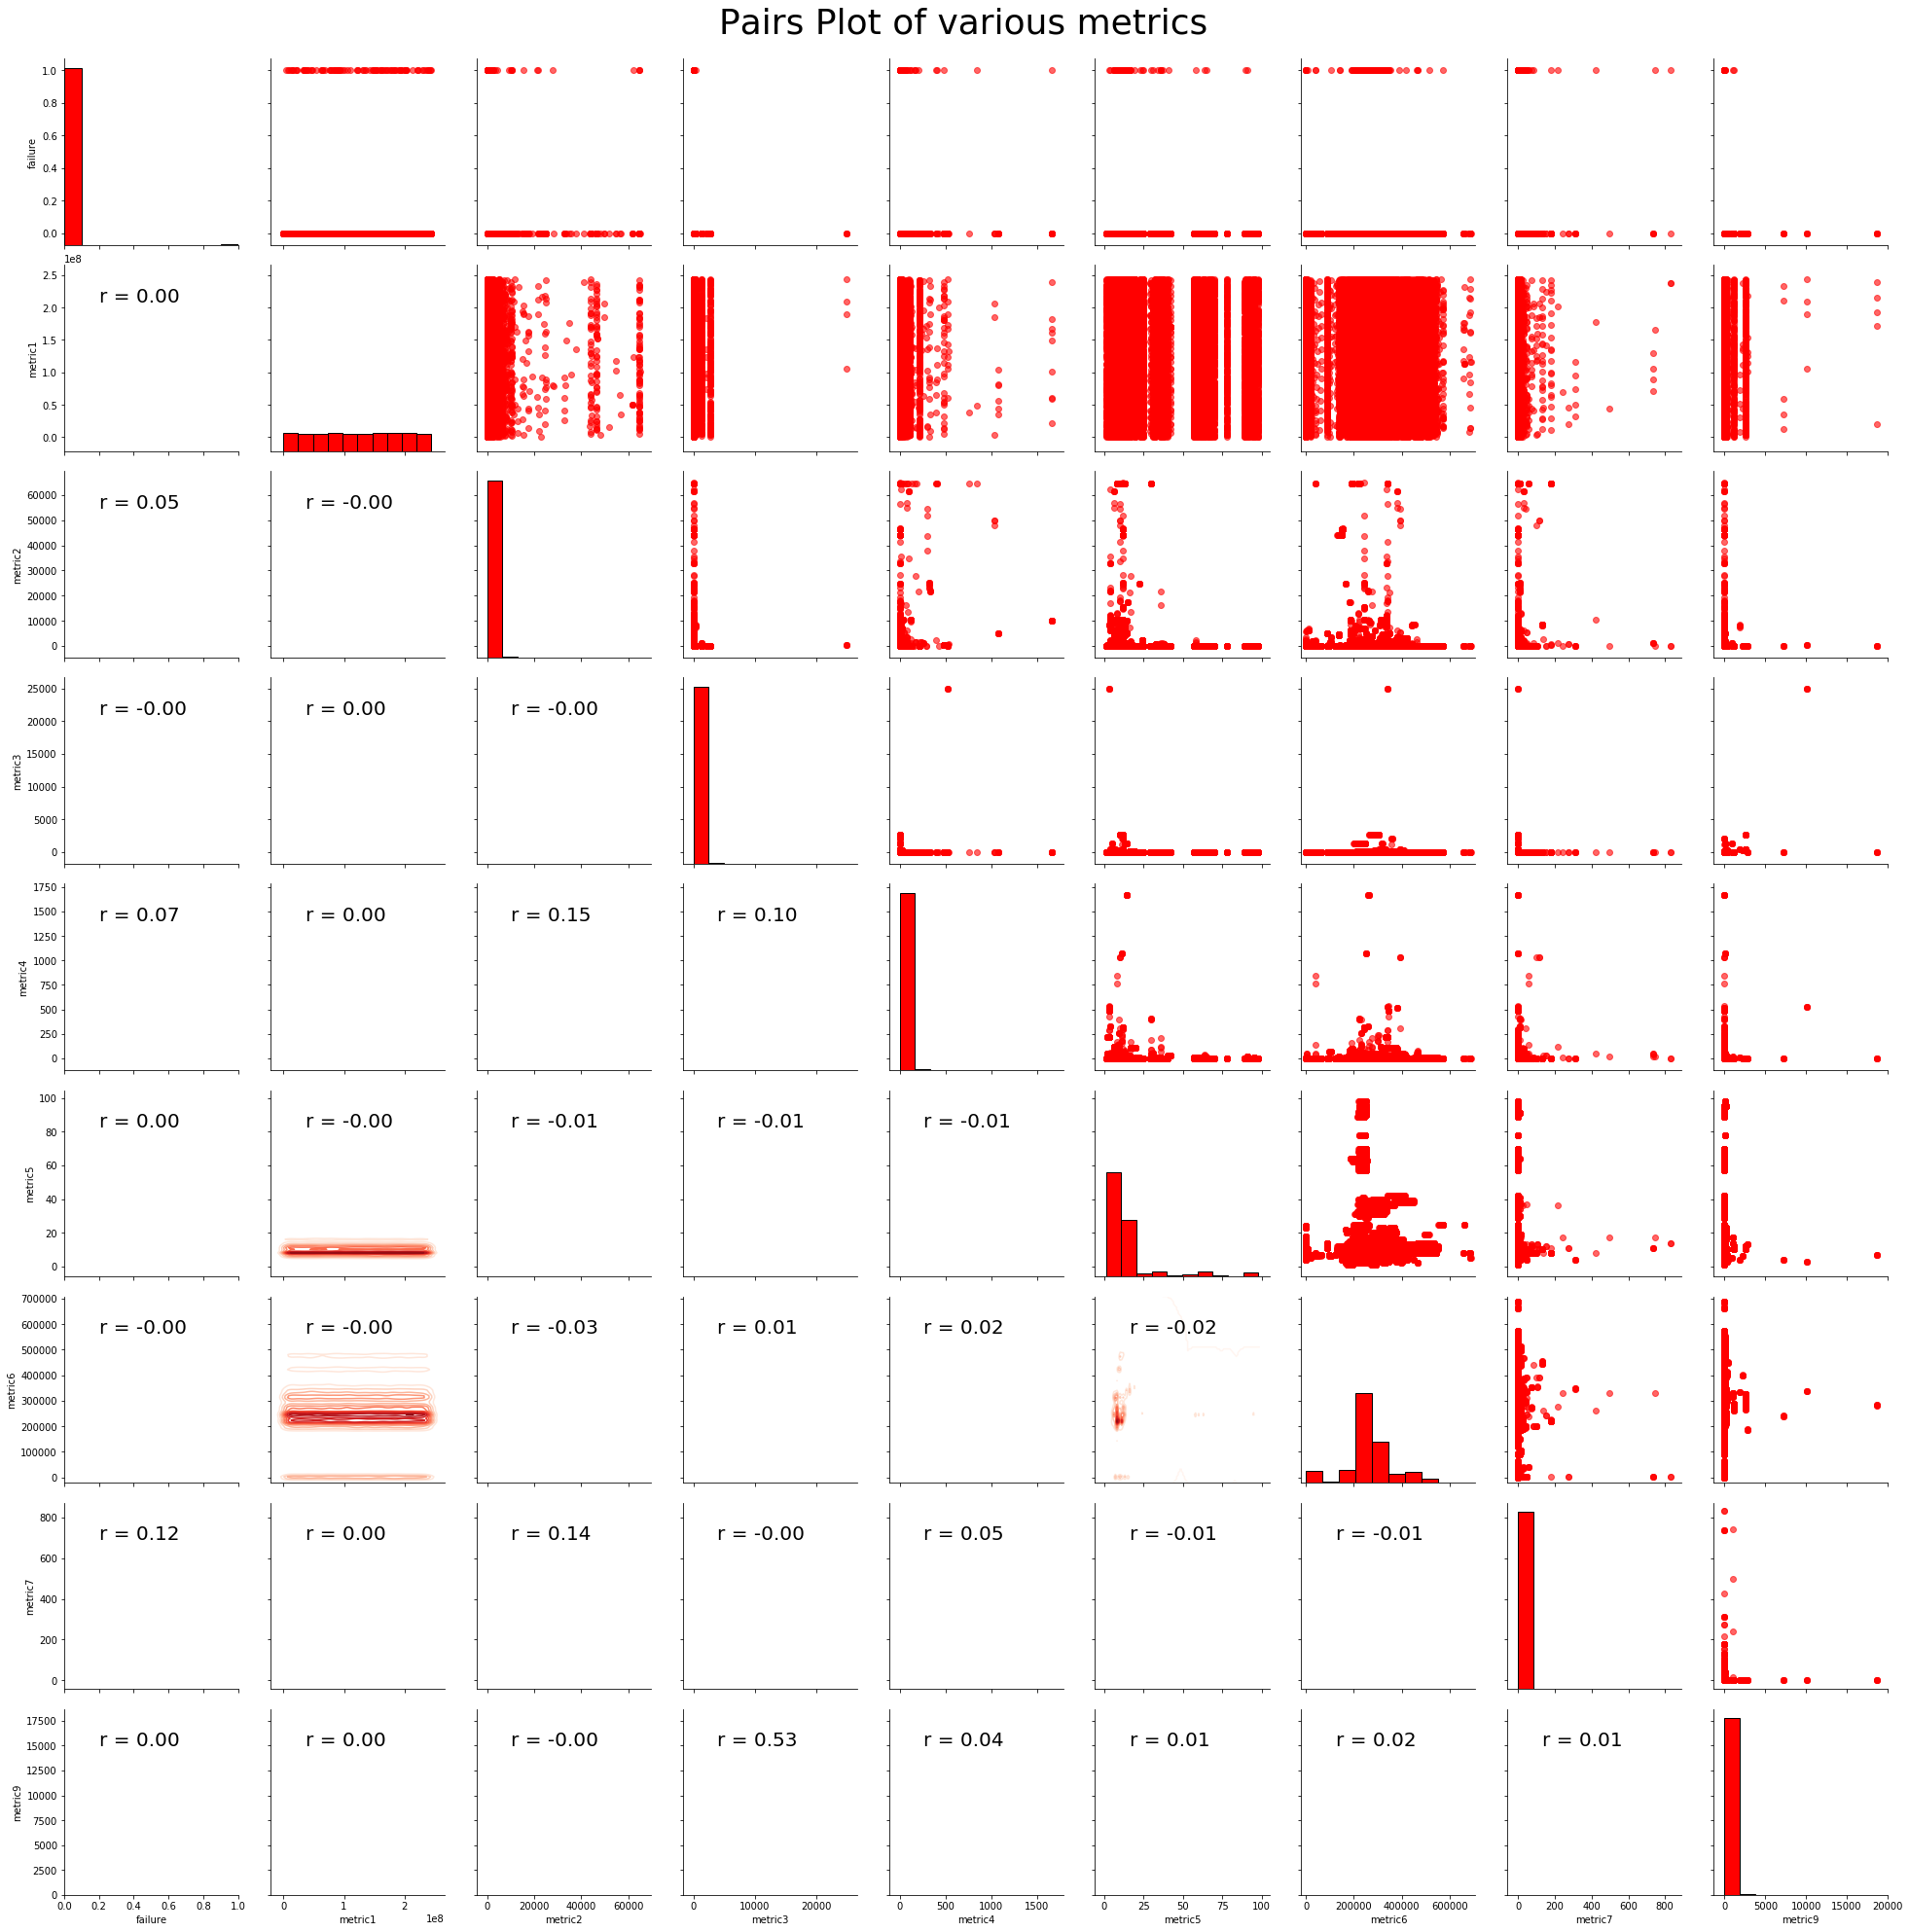

In [11]:
# Extract the columns to  plot
plot_data = device_telemetry_readings[['failure', 'metric1', 'metric2', 'metric3', 
                            'metric4', 'metric5', 'metric6', 'metric7', 
                            'metric9']]

# Function to calculate correlation coefficient between two columns
def corr_func(x, y, **kwargs):
    r = np.corrcoef(x, y)[0][1]
    ax = plt.gca()
    ax.annotate("r = {:.2f}".format(r),
                xy=(.2, .8), xycoords=ax.transAxes,
                size = 20)

# Create the pairgrid object
grid = sns.PairGrid(data = plot_data, size = 3)

# Upper is a scatter plot
grid.map_upper(plt.scatter, color = 'red', alpha = 0.6)

# Diagonal is a histogram
grid.map_diag(plt.hist, color = 'red', edgecolor = 'black')

# Bottom is correlation and density plot
grid.map_lower(corr_func);
grid.map_lower(sns.kdeplot, cmap = plt.cm.Reds)

# Title for entire plot
plt.suptitle('Pairs Plot of various metrics', size = 36, y = 1.02);

### Feature Engineering and Selection

Now that we have explored our data, and uncovered trends and relationships within the data, we can dive straight into feature engineering and selection part. We can use the results of EDA to inform this feature engineering. To re-iterate, we learned the following from our EDA process:

1. Metrics 7 & 8 are redundant features. Only one of the two are required, as they appear to be duplicates.
2. Metrics 3 & 9 appear to be collinear. Additional pair plots will shed some more light on their collinearity.
3. Failure rate is highest against metric 1, 5 & 6 across different devices. 

#### Definition of feature engineering

Feature engineering can be understood as transforming the data by adding additional features that are derived from raw data. For example, taking log and square root of a variable; or one hot encoding of categorical variables so they can be used in a model. 

#### Definition of feature selection

This is a process where we select only the most relevant variables for feeding into machine learning models. "Most relevant" can depend on many factors, it might be something as simple as highest correlation with the target, or features with most variance. Selecting only the most relevant features help the model generalize better and results are more interpretable. In layman language, feature selection is a process where we subtract variables to be fed into machine learning models so we are left with the most important ones only.

#### Remove collinear features 

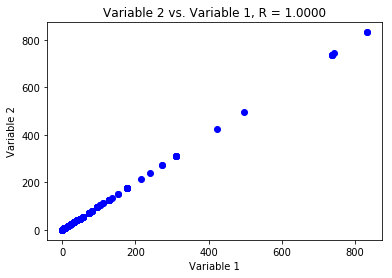

In [4]:
plot_data = device_telemetry_readings[['metric7', 'metric8']].dropna()

plt.plot(plot_data['metric7'], plot_data['metric8'], 'bo')
plt.xlabel('Variable 1'); plt.ylabel('Variable 2')
plt.title('Variable 2 vs. Variable 1, R = %0.4f' % np.corrcoef(device_telemetry_readings[['metric7', 'metric8']].dropna(), rowvar=False)[0][1]);

**Take-away message:** R = 1 in the above plot is a proof that it is meaningful to retain only one of the two variables. I will keep metric7 and remove metric8. 

#### Feature engineering: One hot encoding of device ID column

In [3]:
# Code for encoding categorical feature, device 
data = device_telemetry_readings[['device']]
values = array(data)

# Integer encode
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(values)

# Adding encoded values in the original data frame
device_telemetry_readings['device_encoded'] = ''
device_telemetry_readings['device_encoded'] = integer_encoded

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [4]:
device_telemetry_readings.columns

Index(['date', 'device', 'failure', 'metric1', 'metric2', 'metric3', 'metric4',
       'metric5', 'metric6', 'metric7', 'metric8', 'metric9',
       'device_encoded'],
      dtype='object')

In [4]:
# Final dataframe with encoded and selected features
device_telemetry_readings_final = device_telemetry_readings[['device_encoded', 'failure', 'metric1', 
                                                             'metric2', 'metric3', 'metric4', 'metric5', 'metric6', 
                                                             'metric7', 'metric9']]

In [5]:
device_telemetry_readings_final.shape

(124494, 10)

### Splitting dataset into train and test

For machine learning models we need to split the dataset into training and test sets. 

1. **Training set:** This data set allows the model to learn the mapping between features and target. So training data set will also contain target variable, 'failure' in our present data set. 

2. **Test set:** This data set allows to evaluate mapping learned by the model to accurately predict device column (target variable). Test data set will not contain target variable, so the model will not know answers, instead it will predict the target based on the features provided.  

#### Preparing for model prediction
Now that we know the dataset well, we are ready to train a model and predict the required solution. There are many predictive models available in the market for us to choose from. 

* Logistics Regression
* Decision Tree
* Random forest
* XGBoost
* Support Vector Machines
* Autoencoder in Keras/Tensorflow

In [6]:
# Separate out the features and targets
features = device_telemetry_readings_final.drop(columns='failure')
targets = device_telemetry_readings_final['failure']

# Split into 70% training and 30% testing set
X, X_test, y, y_test = train_test_split(features, targets, test_size = 0.3, random_state = 42)

print(X.shape)
print(X_test.shape)
print(y.shape)
print(y_test.shape)

(87145, 9)
(37349, 9)
(87145,)
(37349,)


### Establishing a baseline for our models

It is important for us to establish a baseline before we begin using machine learning models. Based on the problem description the best model will minimize false positives and false negatives. 

#### Metrics: Precision, Recall and Receiver Operating Characteristic (ROC) curve

**Confusion matrix**
One of the methods to evaluate performance of a classification model is to calculate confusion matrix. 

Basic terminology used in confusion matrix:

1. **True Positives (TP):** Cases which were predicted "device failed" and did indeed failed.
2. **True Negatives (TN):** Cases which were predicted "not failed" and indeed not failed.
3. **False Positives (FP):** Cases which were predicted "failed" but actually not failed.
4. **False Negatives (FN):** Cases which were predicted "not failed" but actually failed.

The aim is to minimize the off-diagonal elements, FN and FP, and maximise the true positives. 

In fact for cases like disease prediction for patients, aim should be to have zero tolerance in these off-diagonal elements.

Below is the definition of recall, precision, and F1-score (average precision recall score) that we will be using through this document for evaluation of different models.  

\begin{equation}
Recall = \frac{TP}{TP+FN}
\end{equation}

\begin{equation}
Precision = \frac{TP}{TP+FP}
\end{equation}

\begin{equation}
F1 = 2*\frac{Recall \times Precision}{Recall + Precision}
\end{equation}

### Logistic Regression

In [27]:
# Using logistic regression model
logreg = LogisticRegression()
logreg.fit(X, y)
y_pred_lr = logreg.predict(X_test)

acc_logreg = round(logreg.score(X, y)*100, 2)
acc_logreg

99.91

In [28]:
# Confusion matrix for Logistic Regression
cm_lr = confusion_matrix(y_test, y_pred_lr)
print(cm_lr)

[[37319     0]
 [   30     0]]


#### Confusion Matrix for Logistic Regression

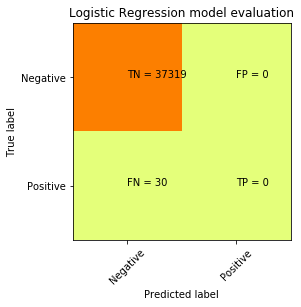

In [29]:
# Plotting confusion matrix for logistic regression model

def plotConfusionMatrix(cm, title_ml):
    plt.clf()
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
    classNames = ['Negative','Positive']
    plt.title(title_ml)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    tick_marks = np.arange(len(classNames))
    plt.xticks(tick_marks, classNames, rotation=45)
    plt.yticks(tick_marks, classNames)
    s = [['TN','FP'],['FN','TP']]
    for i in range(2):
        for j in range(2):
            plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
    plt.show()

# Using the above method
plotConfusionMatrix(cm_lr, 'Logistic Regression model evaluation')


In [40]:
lr_avg_precision = average_precision_score(y_test, y_pred_lr)

print('Average precision-recall score: {0:0.4f}'.format(lr_avg_precision))

Average precision-recall score: 0.0008


**Take-away message:** 

* 99% accuracy obtained for Logistic Regression model means that the model is able to learn well from the dataset. But we can see that the model despite having an accuracy of 99% fails to perform against the baseline established. It is important to note for classification problems precision, recall, F1 score are better metrics compared to accuracy. It is disappointing to see that the precision-recall score is 0 from logistic regression model. 

* Even though true positives are zero, it is still encouraging to see that false positive is zero. 

#### Precision-Recall Curve for Logistic Regression

In [41]:
def plot_precision_recall_curve(y_test, y_predict, avg_precision):
    '''Description: This method plots curves for precision and recall. Basic expectation is that when precision 
    improves recall decreases and vice-versa. 
       Input: y_test, y_predict, avgerage precision values
       Output: Precision-recall plot
    '''
    
    precision, recall, _ = precision_recall_curve(y_test, y_predict)
    
    plt.step(recall, precision, color = 'r', alpha=0.2, where='post')
    plt.fill_between(recall, precision, alpha=0.2, color = 'r')
    
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title('2-class Precision-Recall curve: AP={0:0.4f}'.format(avg_precision))

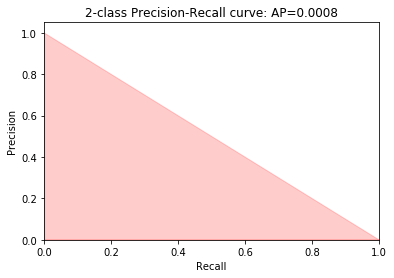

In [42]:
plot_precision_recall_curve(y_test, y_pred_lr, lr_avg_precision)

The precision recall curve above is plotting the baseline only because average precision is is extremely small (AP = 0.008).

### Decision Tree

In [26]:
# Decision Tree 
# Variables: X, y, X_test, y_test

decisiontree = DecisionTreeClassifier()
decisiontree.fit(X, y)
y_pred_dt = decisiontree.predict(X_test)
acc_decisiontree = round(decisiontree.score(X, y) * 100, 2)
acc_decisiontree

100.0

In [27]:
# Confusion matrix for Decision Tree
cm_dt = confusion_matrix(y_test, y_pred_dt)
print(cm_dt)

[[37299    20]
 [   29     1]]


#### Confusion matrix for Decision Tree

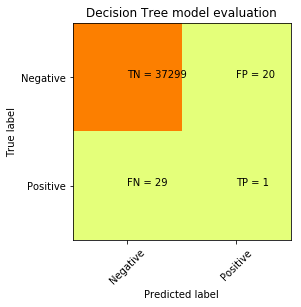

In [28]:
# Visualizing the confusion matrix
plotConfusionMatrix(cm_dt, 'Decision Tree model evaluation')

#### Precision-Recall Curve for Decision Tree 

In [29]:
dt_avg_precision = average_precision_score(y_test, y_pred_dt)

print('Average precision-recall score: {0:0.4f}'.format(dt_avg_precision))

Average precision-recall score: 0.0024


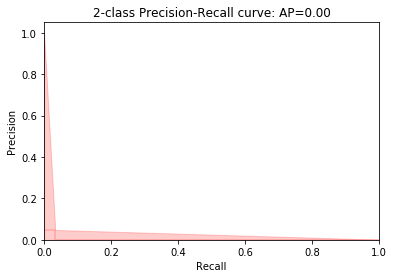

In [32]:
plot_precision_recall_curve(y_test, y_pred_dt, dt_avg_precision)

**Take-away message:** Decision tree performs more poorly because false positive rate increases to 20. This is not acceptable.

In [35]:
# Calculating area under the curve for Receiver Operating Characteristics curve
auc = roc_auc_score(y_test, y_pred_dt)
print('AUC: %.3f' %auc)

AUC: 0.516


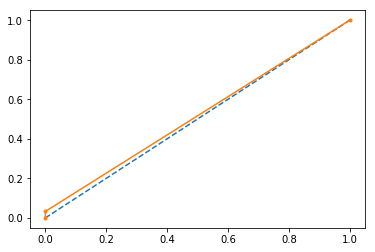

In [36]:
# Calculate the roc curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_dt)
pyplot.plot([0,1], [0,1], linestyle='--')
pyplot.plot(fpr, tpr, marker='.')
pyplot.show()

**When to use ROC vs. Precision-Recall curves?**

* ROC curves should be used when there are roughly equal number of observations for each class. 
* Precision-Recall curves should be used there is moderate to large class imbalance. 

### Random Forest

In [45]:
randomforest = RandomForestClassifier(n_estimators=100)
randomforest.fit(X, y)
y_pred_rf = randomforest.predict(X_test)

acc_randomforest = round(randomforest.score(X, y) * 100, 2)
acc_randomforest

100.0

In [46]:
# Confusion matrix for Random Forest
cm_rf = confusion_matrix(y_test, y_pred_rf)
print(cm_rf)

[[37314     5]
 [   30     0]]


#### Confusion Matrix for Random Forest

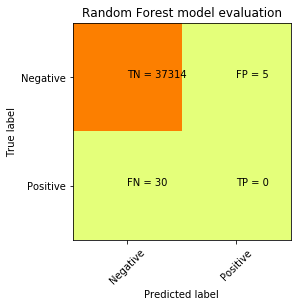

In [20]:
# Visualizing the confusion matrix
plotConfusionMatrix(cm_rf, 'Random Forest model evaluation')

#### Precision-Recall Curve for Random Forest

In [47]:
rf_avg_precision = average_precision_score(y_test, y_pred_rf)

print('Average precision-recall score: {0:0.4f}'.format(rf_avg_precision))

Average precision-recall score: 0.0008


It is disappointing to see that none of these models so far are able to have a reasonable average precision-recall score. 

### Hyper-parameter tuning for decision tree classifier

In [48]:
decisiontree = DecisionTreeClassifier(class_weight=None, criterion='gini',max_depth=1,max_features=None, 
                            max_leaf_nodes=None, min_impurity_split=1e-07, min_samples_leaf=1, 
                            min_samples_split=2, min_weight_fraction_leaf=0.0, presort=False, 
                            random_state=42, splitter='best')
decisiontree.fit(X,y)
y_pred_dt_hpt = decisiontree.predict(X_test)

In [50]:
# Confusion matrix for Random Forest
cm_dt_hpt = confusion_matrix(y_test, y_pred_dt_hpt)
print(cm_dt_hpt)

[[37318     1]
 [   30     0]]


**Take-away message:** Even with additionally tuned hyper-parameters, having false positive rate greater than zero is unacceptable.

#### Max depth hyper-parameter tuning

Max depth indicates the number nodes in a tree. The deeper the tree, the more splits it has and it captures more information about the data. We fit a decision tree with depths ranging from 1 to 32 and plot the training and test auc scores. 

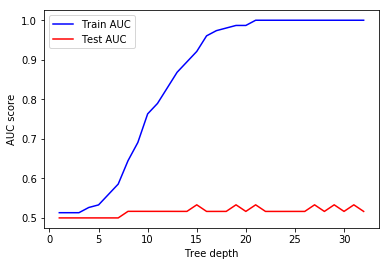

In [30]:
max_depths = np.linspace(1, 32, 32, endpoint=True)

train_results = []
test_results = []

for max_depth in max_depths:
    decisiontree_hpt =  DecisionTreeClassifier(max_depth=max_depth)
    decisiontree_hpt.fit(X,y)
    
    train_pred = decisiontree_hpt.predict(X)
    
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    # Add auc score to previous train results
    train_results.append(roc_auc)
    
    y_pred = decisiontree_hpt.predict(X_test)
    
    false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    # Add auc score to previous test results
    test_results.append(roc_auc)


line1 = plt.plot(max_depths, train_results, 'b', label="Train AUC")
line2 = plt.plot(max_depths, test_results, 'r', label="Test AUC")

plt.legend()
plt.ylabel('AUC score')
plt.xlabel('Tree depth')
plt.show()

**Take-away message:** We can see that our model overfits for large tree depths. It is able to predict all of the train data at a depth of ~20, but fails to generalize findings for test dataset. 

#### Min_samples_split

min_samples_split represents the minimum number of samples required to split an internal node. This can vary between considering at least one sample at each node to considering all of the samples at each node. When we increase this parameter, the tree becomes more constrained as it has to consider more samples at each node. Here we will vary the parameter from 10% to 100% of the samples. 

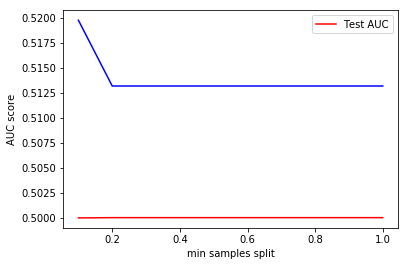

In [47]:
min_samples_splits = np.linspace(0.1, 1.0, 10, endpoint=True)

train_results = []
test_results = []

for min_samples_split in min_samples_splits:
    decisiontree_hpt1 =  DecisionTreeClassifier(min_samples_split=min_samples_split)
    decisiontree_hpt1.fit(X,y)
    
    train_pred = decisiontree_hpt1.predict(X)
    
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)
    
    y_pred = decisiontree_hpt1.predict(X_test)
    
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)
    
line1 = plt.plot(min_samples_splits, train_results, 'b')
line2 = plt.plot(min_samples_splits, test_results, 'r', label="Test AUC")

plt.legend()
plt.ylabel('AUC score')
plt.xlabel('min samples split')
plt.show()

**Take-away message:** We can see that when we select anywhere from 20% to 100% of the sample at each node, the model cannot learn enough about the data. This case represents underfitting. 

In [35]:
df_test = pd.DataFrame([y_test])

In [37]:
df_test = df_test.transpose()

In [41]:
df_test[df_test['failure'] == 1].count()

failure    30
dtype: int64

### XGBoost Classifier

In [7]:
xgboost = XGBClassifier(colsample_bytree=0.4603, gamma=0.0568, 
                             learning_rate=0.08, max_depth=6, 
                             min_child_weight=1.7817, n_estimators=2,
                             reg_alpha=0.465, reg_lambda=0.8575,
                             subsample=0.5213, silent=1,
                             random_state =8, nthread = -1)
xgboost.fit(X, y)

# Make predictions for test data
y_pred_xgboost = xgboost.predict(X_test)

# evaluate predictions
acc_xgboost = round(xgboost.score(X, y) * 100, 2)
acc_xgboost

99.91

In [8]:
false_positive_rate_xg, true_positive_rate_xg, thresholds_xg = roc_curve(y_test, y_pred_xgboost)
roc_auc = auc(false_positive_rate_xg, true_positive_rate_xg)
roc_auc

0.5

In [9]:
# Confusion matrix for Random Forest
cm_xgboost_hpt = confusion_matrix(y_test, y_pred_xgboost)
print(cm_xgboost_hpt)

[[37319     0]
 [   30     0]]


#### Confusion matrix for XGBoost

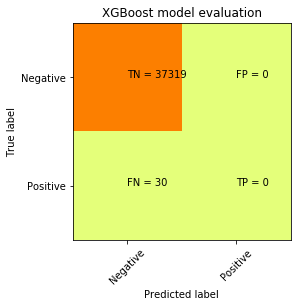

In [14]:
# Visualizing the confusion matrix
plotConfusionMatrix(cm_xgboost_hpt, 'XGBoost model evaluation')

#### Feature Importance from XGBoost

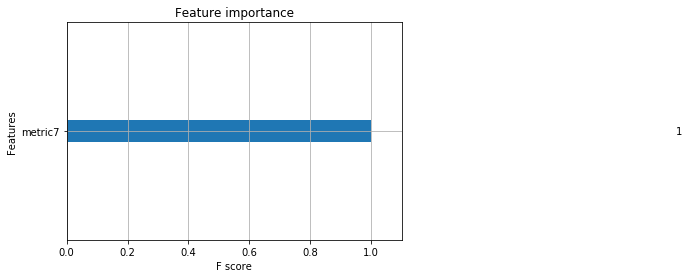

In [55]:
plot_importance(xgboost)
pyplot.show()

**Take-away message:** Interestingly XGBoost models shows that metric 7 is the most important feature to predict failure of a device.

* Also, has zero false positive rate. However, it is also not able to capture true positives as well.

#### Tuning max_depth and min_child_weight

In [17]:
param_test = {
    'max_depth':range(3,10,2),
    'min_child_weight':range(1,6,2)
}
gsearch1 = GridSearchCV(estimator = XGBClassifier(learning_rate = 0.1,
                                                  n_estimator=140,
                                                  max_depth=5,
                                                  min_child_weight=1,
                                                  gamma=0,
                                                  subsample=0.8,
                                                  colsample_bytree=0.8,
                                                  objective='binary:logistic',
                                                  nthread=4,
                                                  scale_pos_weight=1,
                                                  seed=27,
                                                 ),
                        param_grid = param_test, scoring='roc_auc', n_jobs=4, iid=False, cv=5)

gsearch1.fit(X, y)
#gsearch1.grid_scores_, 
gsearch1.best_params_, gsearch1.best_score_

({'max_depth': 3, 'min_child_weight': 1}, 0.8944379056996304)

**Take-away message:** Optimum values returned for max_depth and min_child_weight is 3, 1, respectively. Also, note that CV score has increased drastically this time. But does it show improvement in confusion matrix? 

In [18]:
# Make predictions for test data
y_pred_xgboost_hpt = gsearch1.predict(X_test)

In [19]:
# Confusion matrix for Random Forest
cm_xgboost_hpt1 = confusion_matrix(y_test, y_pred_xgboost_hpt)
print(cm_xgboost_hpt1)

[[37318     1]
 [   29     1]]


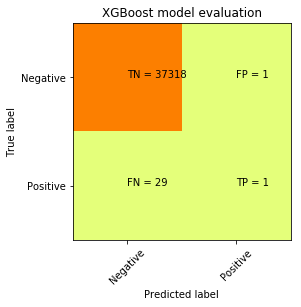

In [20]:
# Visualizing the confusion matrix
plotConfusionMatrix(cm_xgboost_hpt1, 'XGBoost model evaluation')

**Take-away message:** With these tuned parameters, we see that the sum of true negatives and true positives remains the same as previously observed. Interestingly, the sum of false positives and false negatives also remains the same. However, I will throw away these parameters as we should strive for zero false positives. 

#### Reducing Learning Rate

In [21]:
param_test1 = {
    'max_depth':range(3),
    'min_child_weight':range(1)
}
gsearch2 = GridSearchCV(estimator = XGBClassifier(learning_rate = 0.01,
                                                  n_estimator=140,
                                                  max_depth=5,
                                                  min_child_weight=1,
                                                  gamma=0,
                                                  subsample=0.8,
                                                  colsample_bytree=0.8,
                                                  objective='binary:logistic',
                                                  nthread=4,
                                                  scale_pos_weight=1,
                                                  seed=27,
                                                 ),
                        param_grid = param_test1, scoring='roc_auc', n_jobs=4, iid=False, cv=5)

gsearch2.fit(X, y)
#gsearch1.grid_scores_, 
gsearch2.best_params_, gsearch2.best_score_

({'max_depth': 2, 'min_child_weight': 0}, 0.7396402183579811)

Unfortunately reducing learning rate decreases model performance substantially. 

In [22]:
# Make predictions for test data
y_pred_xgboost_hpt2 = gsearch2.predict(X_test)

In [23]:
# Confusion matrix for Random Forest
cm_xgboost_hpt2 = confusion_matrix(y_test, y_pred_xgboost_hpt2)
print(cm_xgboost_hpt2)

[[37319     0]
 [   30     0]]


**Take-away message:** Tuning learning rate also does not result in improving false negative numbers. 

**Notes on XGBoost model:**
XGBoost model has many advantages over other model and if I were to deploy a model in production, I would go with it because of the following reasons. 

* Parallel computing: it is enabled with the power of parallel processing, meaning when you run xgboost, by default it would use all the cores available on your laptop. 

* Regularization: This, in my opinion is the biggest advantage of using XGBoost. Regularization is a technique used to avoid overfitting in linear or tree-based models. 

* Missing values: XGBoost is capable of handling missing values in the data set. It is not relevant for this particular data set, but it is definitely a good capability to have. 

* Flexibility: In addition to regression, classification, and ranking problems, it supports user defined objective functions as well. An objective function is used to measure the performance of the model given a certain set of parameters. Furthermore, it also supports user defined evaluation metrics as well. 

* Versatility: XGBoost is available in R, Python, Scala, Java, and Julia.

* Tree Pruning: Tree pruning stops automatically when negative loss is encountered, XGBoost grows upto max_depth and then prune backward until the improvement in loss function is below a threshold. 

### Support Vector Machines

In [16]:
# Using pipeline to chain transformers and estimators in one go

pipe_lrSVC = Pipeline([('scaler', StandardScaler()), ('clf', LinearSVC())])
pipe_lrSVC.fit(X, y)
y_pred_svc = pipe_lrSVC.predict(X_test)

#Y_pred_svc = svc.predict(X_test)
acc_svc = round(pipe_lrSVC.score(X, y)*100,2)
acc_svc

99.91

In [17]:
# Confusion matrix for Logistic Regression
cm_svc = confusion_matrix(y_test, y_pred_svc)
print(cm_svc)

[[37319     0]
 [   30     0]]


### Anomaly Detection

Considering that this data set has a huge class imbalance, I am going to treat this problem as anomaly detection problem. For that let's train Autoencoder Neural Network in an unsupervised fashion for anomaly detection in device failure. 

The autoencoder used here consists of 4 fully connected layers with 14, 7, 7 and 29 neurons respectively. The first two layers are used for our encoder, the last two go for the decoder. Additionally, L1 regularization will be used during training.

In [72]:
# Building the model
from keras.models import Model, load_model
from keras.layers import Input, Dense
from keras.callbacks import ModelCheckpoint, TensorBoard
from keras import regularizers

input_dim = X.shape[1]
encoding_dim = 14
input_layer = Input(shape=(input_dim, ))

encoder = Dense(encoding_dim, activation="tanh", 
                activity_regularizer=regularizers.l1(10e-5))(input_layer)
encoder = Dense(int(encoding_dim / 2), activation="relu")(encoder)
decoder = Dense(int(encoding_dim / 2), activation='tanh')(encoder)
decoder = Dense(input_dim, activation='relu')(decoder)
autoencoder = Model(inputs=input_layer, outputs=decoder)

Let’s train our model for 100 epochs with a batch size of 32 samples and save the best performing model to a file. The ModelCheckpoint provided by Keras is really handy for such tasks.

In [74]:
nb_epoch = 100
batch_size = 32
autoencoder.compile(optimizer='adam', 
                    loss='mean_squared_error', 
                    metrics=['accuracy'])
checkpointer = ModelCheckpoint(filepath="model.h5",
                               verbose=0,
                               save_best_only=True)
tensorboard = TensorBoard(log_dir='./logs',
                          histogram_freq=0,
                          write_graph=True,
                          write_images=True)
history = autoencoder.fit(X, X,
                    epochs=nb_epoch,
                    batch_size=batch_size,
                    shuffle=True,
                    validation_data=(X_test, X_test),
                    verbose=1,
                    callbacks=[checkpointer, tensorboard]).history

Train on 87145 samples, validate on 37349 samples
Epoch 1/100
87145/87145 [==============================] - 3s 37us/step - loss: 2209048518884360.5000 - acc: 0.0011 - val_loss: 2231990646564285.0000 - val_acc: 8.8356e-04
Epoch 2/100
87145/87145 [==============================] - 3s 33us/step - loss: 2209047956867165.2500 - acc: 0.0011 - val_loss: 2231990197948833.0000 - val_acc: 8.8356e-04
Epoch 3/100
87145/87145 [==============================] - 3s 35us/step - loss: 2209047369326346.2500 - acc: 0.0011 - val_loss: 2231989389900541.0000 - val_acc: 8.8356e-04
Epoch 4/100
87145/87145 [==============================] - 3s 33us/step - loss: 2209046747498361.7500 - acc: 0.0011 - val_loss: 2231988890536133.2500 - val_acc: 8.8356e-04
Epoch 5/100
87145/87145 [==============================] - 3s 33us/step - loss: 2209046191059646.5000 - acc: 0.0011 - val_loss: 2231988391329844.5000 - val_acc: 8.8356e-04
Epoch 6/100
87145/87145 [==============================] - 3s 32us/step - loss: 2209045589

87145/87145 [==============================] - 3s 36us/step - loss: 2208993127268829.0000 - acc: 0.0011 - val_loss: 2231934912642850.7500 - val_acc: 8.8356e-04
Epoch 96/100
87145/87145 [==============================] - 3s 37us/step - loss: 2208992537354615.0000 - acc: 0.0011 - val_loss: 2231934163932241.2500 - val_acc: 8.8356e-04
Epoch 97/100
87145/87145 [==============================] - 3s 37us/step - loss: 2208991923977518.7500 - acc: 0.0011 - val_loss: 2231933659109140.5000 - val_acc: 8.8356e-04
Epoch 98/100
87145/87145 [==============================] - 3s 33us/step - loss: 2208991364617109.2500 - acc: 0.0011 - val_loss: 2231933164937498.7500 - val_acc: 8.8356e-04
Epoch 99/100
87145/87145 [==============================] - 3s 32us/step - loss: 2208990759670879.5000 - acc: 0.0011 - val_loss: 2231932407620194.7500 - val_acc: 8.8356e-04
Epoch 100/100
87145/87145 [==============================] - 3s 36us/step - loss: 2208990158364060.7500 - acc: 0.0011 - val_loss: 2231931906203835.5

In [11]:
# Loading the saved model
autoencoder = load_model('model.h5')

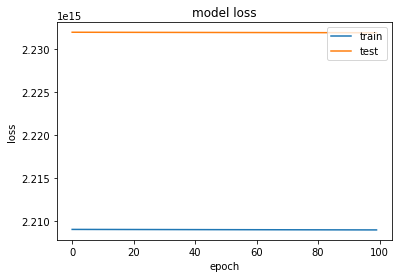

In [12]:
# Visualizing model losses as a function of epoch
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right');

In [15]:
predictions = autoencoder.predict(X_test)
mse = np.mean(np.power(X_test - predictions, 2), axis=1)
error_df = pd.DataFrame({'reconstruction_error': mse,
                        'true_class': y_test})
error_df.describe()

,reconstruction_error,true_class
count,3.734900e+04,37349.000000
mean,2.231934e+15,0.000803
std,1.974789e+15,0.028330
min,4.511431e+09,0.000000
25%,4.292254e+14,0.000000
50%,1.695366e+15,0.000000
75%,3.766663e+15,0.000000
max,6.622628e+15,1.000000


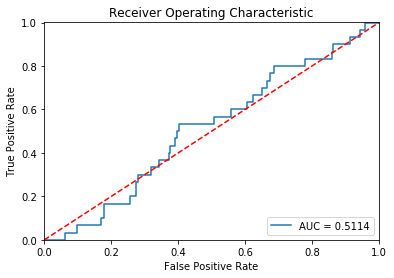

In [16]:
fpr, tpr, thresholds = roc_curve(error_df.true_class, error_df.reconstruction_error)
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, label='AUC = %0.4f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.001, 1])
plt.ylim([0, 1.001])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show();

**Take-away message:** ROC curves are plotted to see how well your classifier is able to separate positive and negative examples and identifies the best threshold for separating them. So in an ideal situation we want the blue curve to be as close as possible to the upper left corner. The Area Under the Curve (AUC) = 0.51 is pretty close to what was obtained with other models. 

* Also, keep in mind, as noted previously, for a data set like this ROC curve is not the best evaluator. So we will continue to focus on confusion matrix.

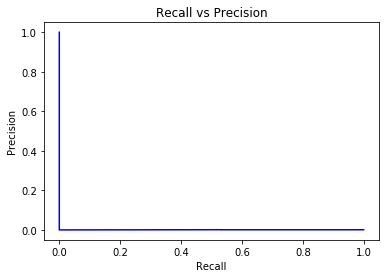

In [18]:
precision, recall, th = precision_recall_curve(error_df.true_class, error_df.reconstruction_error)
plt.plot(recall, precision, 'b', label='Precision-Recall curve')
plt.title('Recall vs Precision')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

**Take-away message:** Precision measures the relevancy of the obtained results. Recall on the other hand shows how many relevant results are obtained. Precision and recall are often in tension. Improving one, degrades other. 

* Similar to a ROC curve, high AUC here would represent high recall and precision. But because of high class imbalance in this dataset, the AUC is obviously 0.  

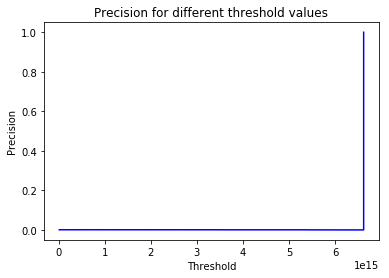

In [19]:
plt.plot(th, precision[1:], 'b', label='Threshold-Precision curve')
plt.title('Precision for different threshold values')
plt.xlabel('Threshold')
plt.ylabel('Precision')
plt.show()

**Take-away message:** Precision goes up for very small threshold or can be considered as no threshold whatsoever. 

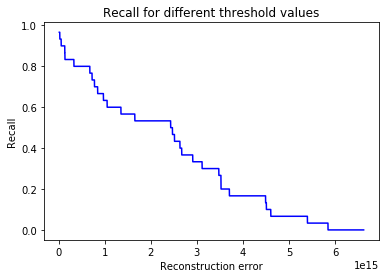

In [20]:
plt.plot(th, recall[1:], 'b', label='Threshold-Recall curve')
plt.title('Recall for different threshold values')
plt.xlabel('Reconstruction error')
plt.ylabel('Recall')
plt.show()

In [68]:
threshold = 6.63e15

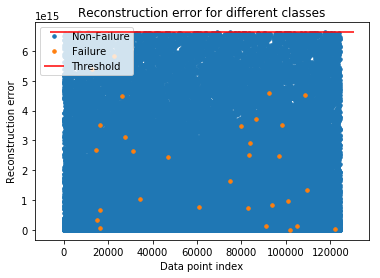

In [69]:
# Visualizing failure and non failure cases for a given threshold value. 
# One can adjust the threshold value in the above cell.
groups = error_df.groupby('true_class')
fig, ax = plt.subplots()

for name, group in groups:
    ax.plot(group.index, group.reconstruction_error, marker='o', ms=3.5, linestyle='',
            label= "Failure" if name == 1 else "Non-Failure")
ax.hlines(threshold, ax.get_xlim()[0], ax.get_xlim()[1], colors="r", zorder=100, label='Threshold')
ax.legend()
plt.title("Reconstruction error for different classes")
plt.ylabel("Reconstruction error")
plt.xlabel("Data point index")
plt.show();

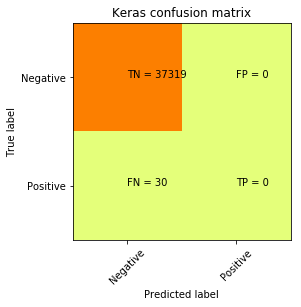

In [70]:
y_pred = [1 if e > threshold else 0 for e in error_df.reconstruction_error.values]
conf_matrix = confusion_matrix(error_df.true_class, y_pred)
# Visualizing the confusion matrix
plotConfusionMatrix(conf_matrix, 'Keras confusion matrix')

**Take-away message:** 
    
* I have used a wide range of models here, starting from simplistic models, such as Logistic Regression to quite sophisticated models, such as neural network using Keras/TensorFlow. 

* At the end of the day, the best keras, XGBoost, and Logistic Regression model give the best evaluation based on the confusion matrix where false positive rate is zero. 

* However, at this point given the current state of the data set I am not able to increase true positive rate, thereby reducing false negatives. 

# Closing statements

* The given data set has very high class imbalance. Meaning there are extremely large number of non-failure instances compared to failure instances. Out of total instances in the test data set, there are 37319 instances of non-failure with the test sample, while only 30 instances of failure cases exist. 

* Given the nature of the data set, our models are not able to reduce false negatives. All of the failure cases result in false negatives category. 

* So what is the cost of classifying failure cases as the legitimate ones

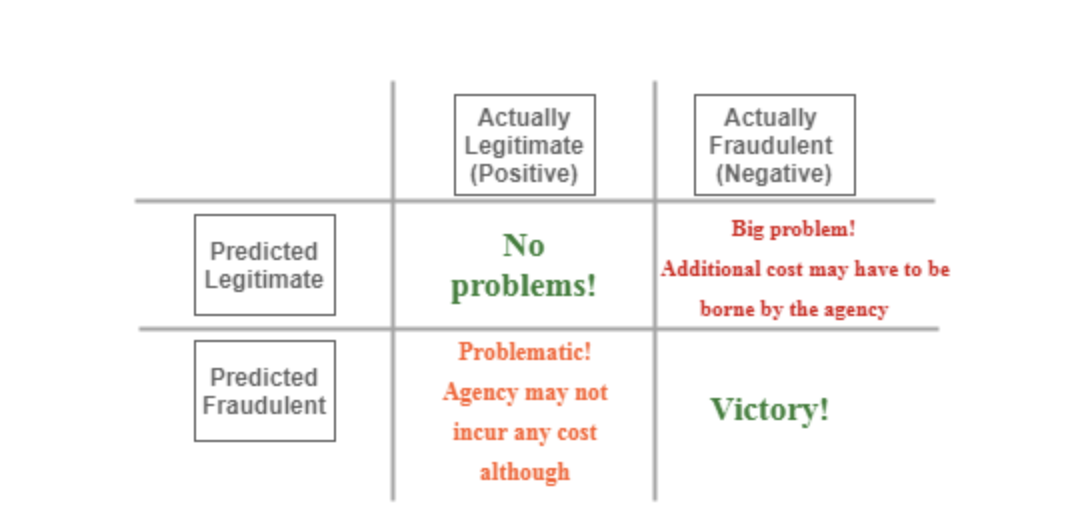

In [21]:
from IPython.display import Image
from IPython.core.display import HTML
PATH = "/Users/monsharm6/Desktop/"
Image(filename = PATH + "ConfusionMatrix.png", width=600, height=600)

* As explained in the picture above, most of the models demonstrated in this work are able to correctly identify true negatives and the remaining are identified as false negatives. This I believe is not so problematic, as there is no cost to the company. However, false positives are a big problem. We definitely want to deploy a model that is able to keep it at 0. And ofcourse, correctly identifying true positives is a big win. 

* One way to combat class imbalance is to collect more data, especially with more instances of failure. That way our models will have better predictive capabilities. 

* Instead of using model accuracy as a benchmark, I have used confusion matrix, precision, and recall as selection critera for models used in this analysis. However, it appears that none of the models despite hyper-parameter tuning are able to learn to predict failure instances with accuracy.


* XGBoost has additional features that makes it more alluring to be used for production deployment. 